# Salary Prediction and analysis

## Importing Necessary Libraries

In [71]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

## Getting the data

In [2]:
df = pd.read_csv('data/ds_salaries.csv')

## Inspecting the data

In [3]:
# Seeems like we have no null data. That looks good
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [6]:
df.remote_ratio.unique()

array([100,   0,  50])

In [7]:
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [8]:
df.job_title.unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [9]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2398,2022,SE,FT,Data Scientist,185900,USD,185900,US,0,US,M
804,2023,MI,FT,Data Analyst,100000,USD,100000,CA,100,CA,M
488,2023,SE,FT,Data Scientist,317070,USD,317070,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
2429,2022,SE,FT,Data Engineer,140000,USD,140000,US,100,US,M
1389,2023,SE,FT,Data Engineer,182750,USD,182750,US,100,US,M
169,2023,SE,FT,Analytics Engineer,150000,USD,150000,US,100,US,M
2640,2022,SE,FT,Data Architect,225000,USD,225000,US,100,US,M
3438,2022,EN,FT,Data Scientist,66500,CAD,51081,CA,100,CA,L
2630,2022,SE,FT,Data Scientist,225000,USD,225000,US,0,US,M


## Exploring the work_year column

In [10]:
df.work_year.value_counts()

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64

<Axes: xlabel='work_year'>

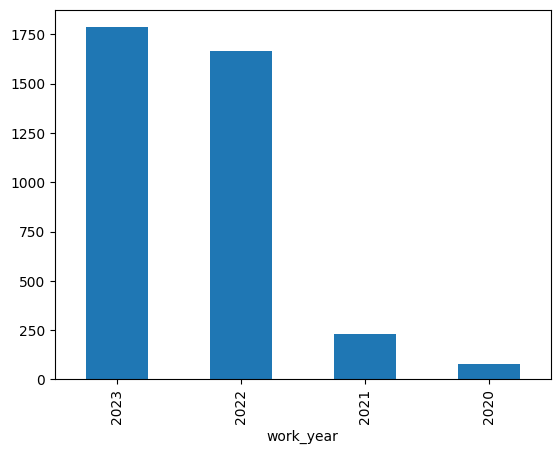

In [11]:
df.work_year.value_counts().plot(kind = 'bar')

## Exploring the experience_level column

In [12]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

## Cleaning the job title column

In [13]:
def attribute_job_title(row):
    row  = row.lower()
    eng = 'data engineer'
    eng2 = 'research engineer'
    sci = 'data scien'
    sci2 = 'research scientist'
    sci3 = 'etl'
    ana = 'data analyst'
    ana2 = 'bi developer'
    ana3 = 'analytics'
    ai = 'artificial intelligence'
    ai2 = 'ai'
    ai3 = 'ml'
    ai4 = 'machine learning'
    ai5 = 'computer vision'
    ai6 = 'deep learning'
    ai7 = 'nlp'
    if eng in row or eng2 in row or 'architect' in row or 'management' in row:
        return 'Data Engineer'
    elif ana in row or ana2 in row or ana3 in row or 'analyst' in row:
        return 'Data Analyst'
    elif ai in row or ai2 in row or ai3 in row or ai4 in row or ai5 in row or ai6 in row or ai7 in row or 'autonomous' in row:
        return 'Machine Learning Engineer'
    elif sci in row or sci2 in row or sci3 in row or 'scientist' in row:
        return 'Data Scientist'
    elif 'data' in row  or 'engineer' in row:
        return 'Data Engineer'
    return row 

df['job_title'].apply(attribute_job_title).value_counts()

job_title
Data Engineer                1300
Data Scientist               1139
Data Analyst                  835
Machine Learning Engineer     481
Name: count, dtype: int64

In [14]:
df['job_title'] = df['job_title'].apply(attribute_job_title)

In [15]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1552,2023,SE,FT,Data Scientist,72000,EUR,77262,LV,0,LV,M
3428,2022,MI,FT,Data Scientist,157000,USD,157000,US,100,US,L
2637,2022,MI,FT,Machine Learning Engineer,98200,USD,98200,US,100,US,L
1516,2023,SE,FT,Data Scientist,104000,USD,104000,US,100,US,M
2916,2022,EX,FT,Machine Learning Engineer,200000,USD,200000,US,100,US,S
1487,2023,SE,FT,Data Scientist,183500,USD,183500,US,100,US,M
1873,2022,EN,FT,Data Scientist,23000,EUR,24165,IT,50,IT,M
3144,2022,MI,FT,Data Engineer,75000,GBP,92350,GB,100,GB,M
801,2023,SE,FT,Data Analyst,250000,USD,250000,US,100,US,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


## Dropping the salary and salary_currency column

In [16]:
df.drop(['salary', 'salary_currency'], axis  = 1, inplace = True)

In [17]:
df.sample(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2591,2022,SE,FT,Data Scientist,38000,US,100,US,M
83,2022,EN,FT,Machine Learning Engineer,300000,IN,50,IN,L


## Cleaning the company location column

<Axes: xlabel='company_location'>

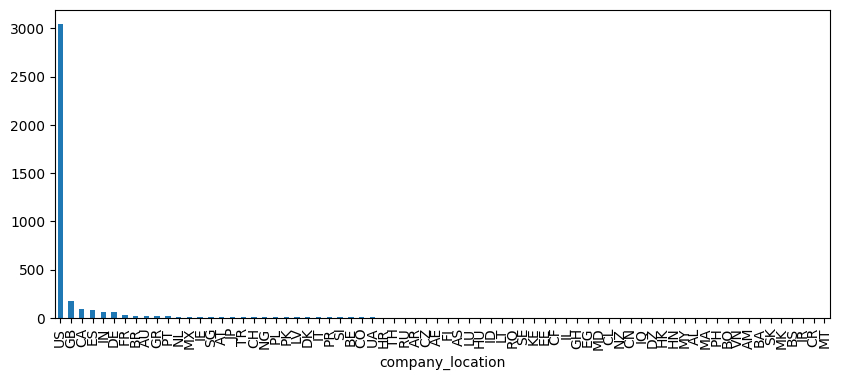

In [18]:
df.company_location.value_counts().plot(kind = 'bar', figsize = (10,4))

In [19]:
df.company_location.value_counts()[:10]

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64

In [20]:
def allocate_company_location(row):
    sig_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']
    if row in sig_countries:
        return row 
    return 'other countries'


df['company_location'].apply(allocate_company_location).value_counts()

company_location
US                 3040
other countries     231
GB                  172
CA                   87
ES                   77
IN                   58
DE                   56
FR                   34
Name: count, dtype: int64

In [21]:
df['company_location'] = df['company_location'].apply(allocate_company_location)

In [22]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3131,2022,SE,FT,Data Analyst,150075,US,100,US,M
2098,2022,SE,FT,Data Analyst,125000,US,100,US,M
68,2023,SE,FT,Data Scientist,309400,US,0,US,L
3217,2022,SE,FT,Data Scientist,180000,US,100,US,M
215,2023,SE,FT,Data Analyst,120000,US,100,US,M
3062,2022,EN,FT,Data Scientist,50000,AT,50,other countries,M
3166,2022,SE,FT,Data Scientist,215300,US,100,US,L
3329,2022,SE,FT,Data Analyst,184700,US,0,US,M
3049,2022,SE,FT,Data Engineer,115000,US,100,US,M
3156,2022,MI,FT,Machine Learning Engineer,116976,GB,0,GB,M




## Exploring the employment_type column

In [23]:
# we can see that the employment type is ok so we leave it like that
df.employment_type.value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

## Cleaning the employee_residence column

In [24]:
df.employee_residence.value_counts()[:10]

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
DE      48
FR      38
PT      18
BR      18
GR      16
Name: count, dtype: int64

In [25]:
def allocate_employee_residence(row):
    sig_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']
    if row in sig_countries:
        return row
    return 'other countries'

df['employee_residence'].apply(allocate_employee_residence).value_counts()

employee_residence
US                 3004
other countries     262
GB                  167
CA                   85
ES                   80
IN                   71
DE                   48
FR                   38
Name: count, dtype: int64

In [26]:
df['employee_residence'] = df['employee_residence'].apply(allocate_employee_residence)

## Explorng the company_size_column

In [27]:
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [28]:
# we can see that the company size is also ok so we leave it like that
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [29]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [30]:
df.corr(numeric_only = True)

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


## Data Visualization

### Work_year

<Axes: xlabel='work_year', ylabel='salary_in_avg'>

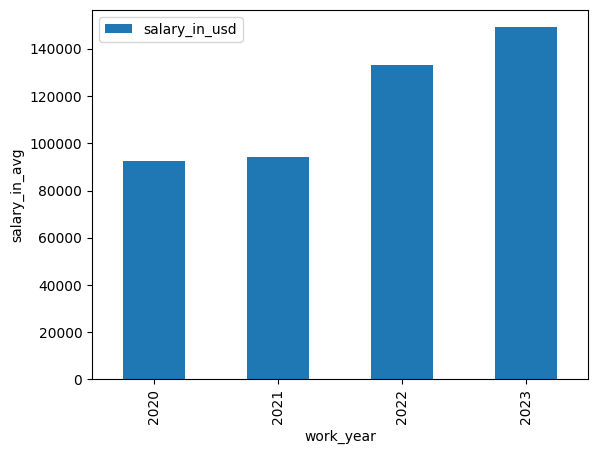

In [31]:
df[['work_year', 'salary_in_usd']].groupby('work_year').agg('mean').plot(kind = 'bar', xlabel = 'work_year',ylabel = 'salary_in_avg')


The visualization above showed the following:

- Data science as a profession records a very significant higher average salary
- The trend for increase in salary continues 


### experience_level

<Axes: xlabel='experience_level', ylabel='salary_in_avg'>

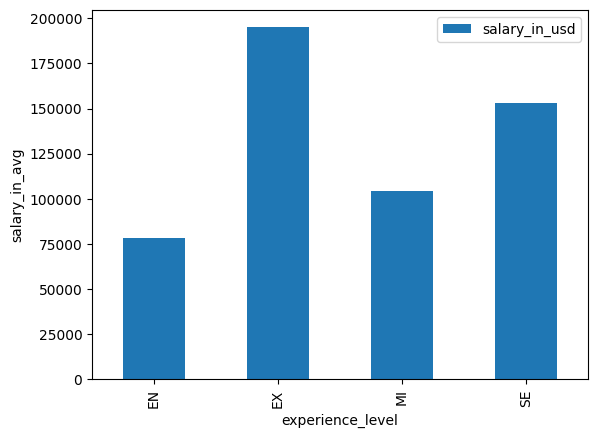

In [32]:
df[['experience_level', 'salary_in_usd']].groupby('experience_level').agg('mean').plot(kind = 'bar', xlabel = 'experience_level',ylabel = 'salary_in_avg')

From the bar chart above the following observations were taken: 

- `Entry Level` developers earn on average around $75000 per year
  
- The highest paid position are for the Expert `Data Scientists/Engineer` which is around $190000 per year

- `Senior Engineers` earn on average around $160000 per year

- `Machine Learning` Engineer earn on average above $100000 per year

### employment_type

<Axes: xlabel='employment_type', ylabel='salary_in_avg'>

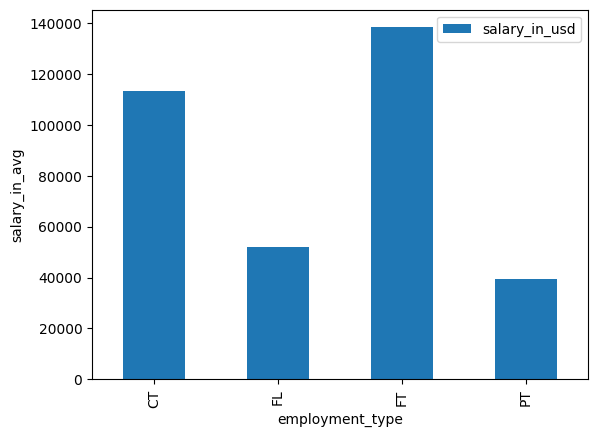

In [33]:
df[['employment_type', 'salary_in_usd']].groupby('employment_type').agg('mean').plot(kind = 'bar', xlabel = 'employment_type',ylabel = 'salary_in_avg')

From the bar chart above the following observations were taken: 

- `Part Time` job Developers earn on average around $40000 per year
  
- `Full Time` job Developers earn the highest which is around $135000 per year

- `Contract` job Developers earn on average around $115000 per year

- `Freelance` job Developers earn on average around $50000 per year

### job_title

<Axes: xlabel='job_title', ylabel='salary_in_avg'>

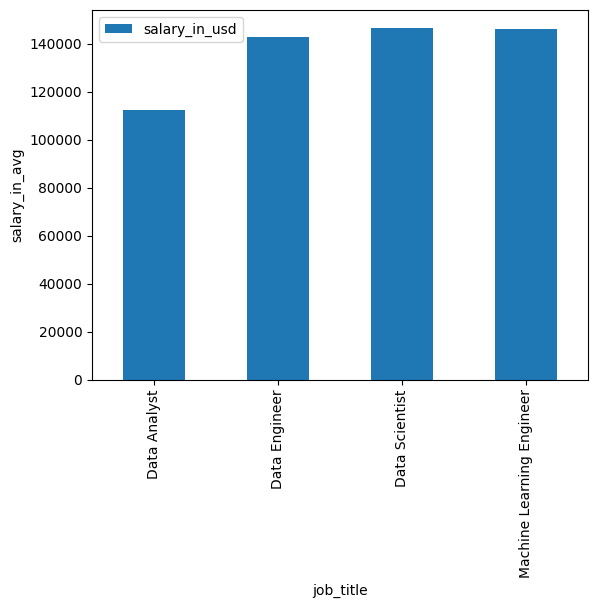

In [34]:
df[['job_title', 'salary_in_usd']].groupby('job_title').agg('mean').plot(kind = 'bar', xlabel = 'job_title',ylabel = 'salary_in_avg')


The chart above showed that Data Analyst are the least paid professionals in data science

### company_size

<Axes: xlabel='company_size', ylabel='salary_in_avg'>

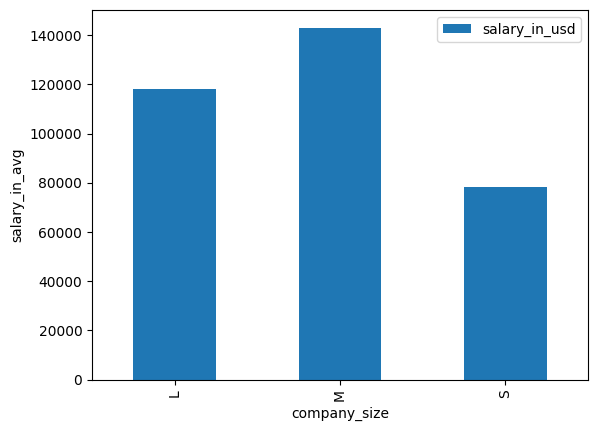

In [35]:
df[['company_size', 'salary_in_usd']].groupby('company_size').agg('mean').plot(kind = 'bar', xlabel = 'company_size',ylabel = 'salary_in_avg')

From the chart above we observe that:

- Mid size company pay higher than Large companies
- Startup and small companies pay the least

### company_location

<Axes: xlabel='company_location', ylabel='salary_in_avg'>

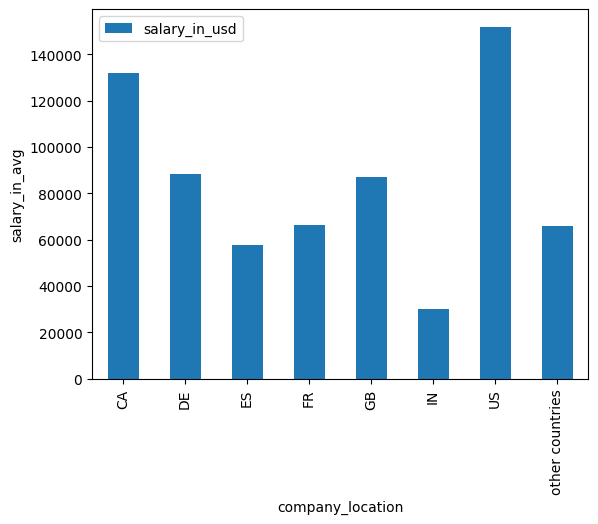

In [36]:
df[['company_location', 'salary_in_usd']].groupby('company_location').agg('mean').plot(kind = 'bar', xlabel = 'company_location',ylabel = 'salary_in_avg')

<Axes: ylabel='count'>

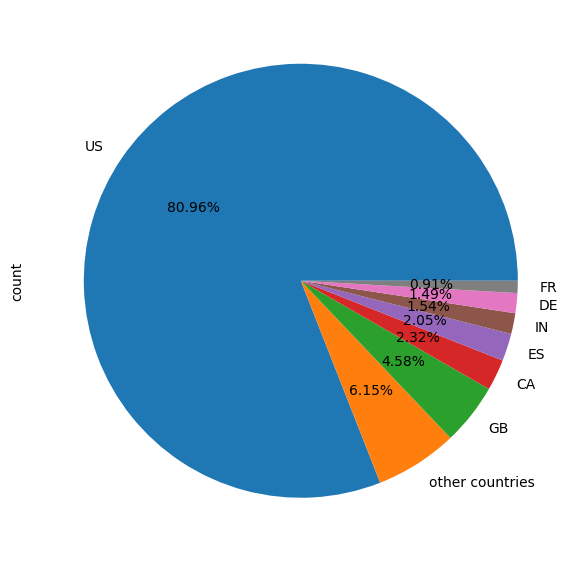

In [37]:
cl = df.company_location.value_counts()
cl.plot(kind = 'pie', labels= cl.index, autopct='%1.2f%%', figsize = (7,10))

From the bar chart above:

- US companies pay the Highest followed by Canada
- Indian companies pay the lowest

The pie chart above shows that:
 
- The demand for data science profession is relatively high in the US

### employee_residence

<Axes: ylabel='count'>

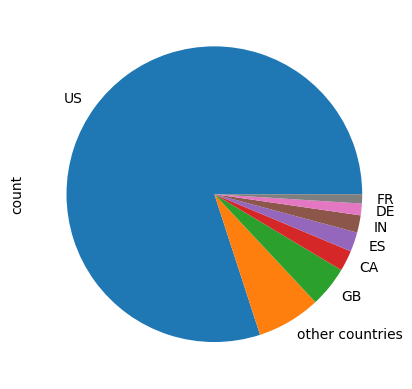

In [38]:
er = df.employee_residence.value_counts()
er.plot(kind = 'pie')

The most data science professionals come from the US

### Conclusion

Based on the provided observations, we can draw the following data analytic summary:

* `Salary Analysis`: The visualization indicates that data science as a profession records significantly higher average salaries compared to other roles. The highest-paid positions are Expert Data Scientists/Engineers, followed by Senior Engineers and Machine Learning Engineers. Entry-level developers in the data science field earn an average salary of around $75,000 per year.

* `Job Type Analysis`: The bar chart reveals that full-time job developers earn the highest average salary, followed by contract job developers. Part-time and freelance job developers earn comparatively lower salaries.

* `Data Analyst Salary`: Data analysts are observed to be the least paid professionals in the data science field, according to the provided information.

* `Company Size Analysis`: The chart indicates that mid-size companies tend to offer higher salaries compared to large companies. Startup and small companies generally offer lower salaries.

* `Geographical Salary Analysis`: Based on the bar chart, US companies pay the highest salaries, followed by Canada. On the other hand, Indian companies offer relatively lower salaries.

* `Geographical Demand`: The pie chart suggests that there is relatively high demand for data science professionals in the US, as the majority of data science professionals come from the US.

In conclusion, data science as a profession offers higher average salaries, with expert-level positions commanding the highest pay. Full-time job developers tend to earn higher salaries compared to other job types. Salary levels and demand for data science professionals vary across countries, with the US being a prominent location for data science opportunities.

In [39]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000
mean,2022.373635,137570.389880,46.271638
std,0.691448,63055.625278,48.589050
min,2020.000000,5132.000000,0.000000
25%,2022.000000,95000.000000,0.000000
50%,2022.000000,135000.000000,0.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


## Data Encoding

The following columns are in object or categorical datatypes
- experience_level
- employment_type
- job_title
- employee_residence
- remote_ratio
- company_location
- company_size

In [40]:
df['employee_residence'] = df['employee_residence'].apply(lambda x: 'US' if x == 'US' else 'other_countries')

In [41]:
df['company_location'] = df['company_location'].apply(lambda x: 'US' if x == 'US' else 'other_countries')

In [42]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,85847,other_countries,100,other_countries,L
1,2023,MI,CT,Machine Learning Engineer,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,other_countries,100,other_countries,M
4,2023,SE,FT,Data Scientist,120000,other_countries,100,other_countries,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Data Analyst,100000,US,100,US,L


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary_in_usd       3755 non-null   int64 
 5   employee_residence  3755 non-null   object
 6   remote_ratio        3755 non-null   int64 
 7   company_location    3755 non-null   object
 8   company_size        3755 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.1+ KB


In [44]:
# df['remote_ratio'] = df['remote_ratio'].values.reshape(-1, 1)

In [45]:
# num_cols = ['remote_ratio']
# cat_ordinal_cols = ['job_title', 'employee_residence', 'company_location']
# cat_onehot_cols = ['experience_level', 'employment_type', 'company_size']

In [46]:
# full_pipeline = ColumnTransformer([
#     ("cat_ordinal", OrdinalEncoder(), cat_ordinal_cols),
#     ('cat_onehot', OneHotEncoder(), cat_onehot_cols),
#     ("num",  StandardScaler(), num_cols),    
# ],remainder = 'passthrough')

In [47]:
# full_pipeline

In [48]:
# ready_df = full_pipeline.fit_transform(df)

In [49]:
df = pd.get_dummies(df, columns = ['employee_residence', 'company_location'])

In [50]:
ordinal = OrdinalEncoder()

In [51]:
ordinal_cols = ['work_year', 'remote_ratio', 'job_title', 'employment_type', 'experience_level', 'company_size']

In [52]:
df[ordinal_cols] = ordinal.fit_transform(df[ordinal_cols]).astype('int')


In [53]:
df.sample(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,employee_residence_US,employee_residence_other_countries,company_location_US,company_location_other_countries
246,3,3,2,2,134236,0,1,True,False,True,False
2647,2,2,2,1,98000,0,1,True,False,True,False
3155,2,2,2,3,200000,2,0,False,True,True,False
53,3,3,2,2,199098,2,1,True,False,True,False
2047,2,3,2,2,37824,0,1,False,True,False,True
1310,3,3,2,2,148750,0,1,True,False,True,False
143,3,3,2,0,204500,0,1,True,False,True,False
1197,3,0,2,0,75000,2,1,True,False,True,False
1362,3,3,2,3,163800,0,1,True,False,True,False
3372,2,3,2,0,129000,0,1,True,False,True,False


In [54]:
df.corr()['salary_in_usd'].sort_values(ascending = False)

salary_in_usd                         1.000000
employee_residence_US                 0.483816
company_location_US                   0.466103
experience_level                      0.327173
work_year                             0.228290
job_title                             0.173724
company_size                         -0.000372
employment_type                      -0.010329
remote_ratio                         -0.064171
company_location_other_countries     -0.466103
employee_residence_other_countries   -0.483816
Name: salary_in_usd, dtype: float64

In [55]:
# ((df.shape[0] - 1502) /3755) * 100
# # 2253 + 1502

In [56]:
X = df.drop('salary_in_usd', axis = 1)
y = df['salary_in_usd'].copy()

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.15, random_state = 42) 

In [59]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Testing

In [66]:
lr = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

In [61]:
def get_scores(y_pred, y_test):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {
        'mae': mae,
        'mse': mse,
        'r2': r2
    }

In [62]:
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(get_scores(lr_pred, y_test))

{'mae': 39546.20921985816, 'mse': 2663031036.2978725, 'r2': 0.3265984690748106}


In [63]:
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print(get_scores(tree_pred, y_test))

{'mae': 39448.753439017695, 'mse': 2803807427.854024, 'r2': 0.29100029680422934}


In [64]:
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print(get_scores(forest_pred, y_test))

{'mae': 39156.74511202372, 'mse': 2666486930.0578656, 'r2': 0.3257245760870934}


51311.49701376157